In [1]:
# Required imports for the Project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Loading in the Dataset
df_attrition_data = pd.read_csv(r'./IBM Attrition Data.csv')

In [3]:
df_attrition_data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [4]:
# Exploring to better understand the Dataset
print(f'size: {df_attrition_data.size}')
print(f'shape: {df_attrition_data.shape}')
print(f'columns: {df_attrition_data.columns}')
# From exploring we observe that the response is the attrition column, whilst the others are the features

size: 19110
shape: (1470, 13)
columns: Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')


In [5]:
df_attrition_data.groupby('Attrition').get_group('Yes')

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
14,28,Yes,Research & Development,24,3,Life Sciences,3,3,Single,2028,5,3,4
21,36,Yes,Sales,9,4,Life Sciences,3,1,Single,3407,7,3,5
24,34,Yes,Research & Development,6,1,Medical,2,1,Single,2960,2,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Yes,Sales,9,3,Marketing,4,1,Married,1790,1,2,1
1442,29,Yes,Research & Development,1,4,Medical,1,4,Married,4787,9,4,2
1444,56,Yes,Research & Development,7,2,Technical Degree,4,3,Married,2339,8,1,10
1452,50,Yes,Sales,1,4,Life Sciences,2,3,Divorced,6728,7,3,6


### EXPLORATORY DATA ANALYSIS 

##### 1)Find the age distribution of employees in IBM: Through an Histogram

In [6]:
# Extracting the age column from the dataset
ages_of_employees = df_attrition_data['Age']

In [7]:
# define the x_axis
x_axis = ages_of_employees

In [8]:
# Additional imports for the plot
from matplotlib import style
%matplotlib inline

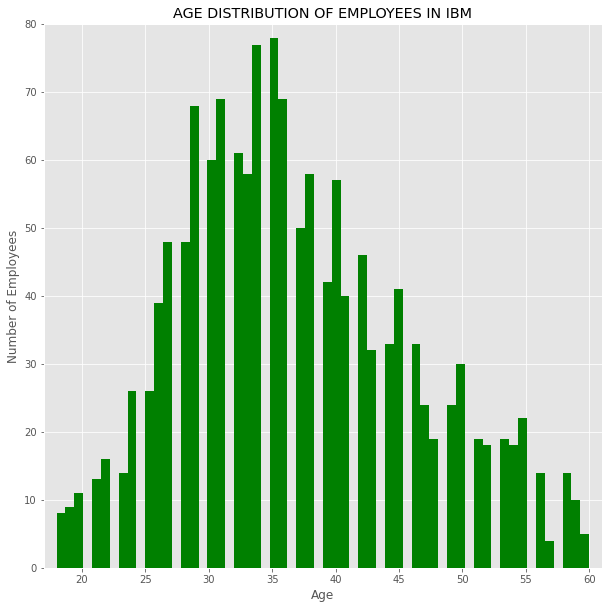

In [9]:
# Configuration for the Histogram plot and creating the plot
style.use('ggplot')
plt.figure(figsize=(10, 10))
h = plt.hist(x_axis, bins=60, facecolor='g')
plt.xlim(17, 61)
plt.ylim(0, 80)
plt.title('AGE DISTRIBUTION OF EMPLOYEES IN IBM')
plt.xlabel('Age')
plt.ylabel('Number of Employees')
plt.show()

##### 2)Explore attrition by age: Through a Grouped Bar Chart

In [10]:
# First the age and the Attrition columns are extracted
df_attrition_by_age = df_attrition_data[['Attrition', 'Age']]
df_attrition_by_age.head()

,Attrition,Age
0,Yes,41
1,No,49
2,Yes,37
3,No,33
4,No,27


In [11]:
# Extracting the age and the corresponding number of attrition status(Yes and No) into lists.
employee_ages = df_attrition_by_age.groupby('Age')
age_labels = []
attrition_value_yes = []
attrition_value_no = []
for age in range(18, 61):
    each_age = employee_ages.get_group(age)
    age_labels.append(age)
    attrition_value_yes.append(len(each_age[each_age.Attrition == "Yes"]))
    attrition_value_no.append(len(each_age[each_age.Attrition == "No"]))

In [12]:
# Addtional imports for the plot
from matplotlib import style
%matplotlib inline

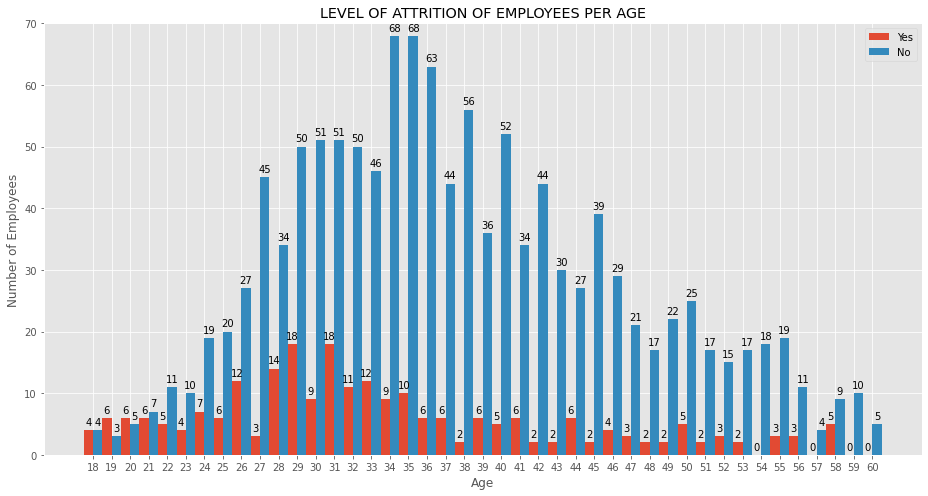

In [13]:
# Creating and configuring the Grouped Bar Chart
x = np.arange(len(age_labels))
width = 0.5
style.use('ggplot')
plt.figure(figsize=(13, 7), tight_layout=True)
plt.ylim(0, 70)
yesBar = plt.bar(x - width/2, attrition_value_yes, width, label='Yes')
noBar = plt.bar(x + width/2, attrition_value_no, width, label='No')
plt.xticks(x, age_labels)
plt.legend()
plt.title('LEVEL OF ATTRITION OF EMPLOYEES PER AGE')
plt.xlabel('Age')
plt.ylabel('Number of Employees')
plt.bar_label(yesBar, padding=3)
plt.bar_label(noBar, padding=3)
plt.show()

##### 3)EXPLORE THE DATA FOR LEFT EMPLOYEES

In [14]:
# Interpreting this as the data for employees that have left the company that is Employees with an attrtion status of YES.
# Extracting the data for employees with an attrition status 'Yes'
employee_attrition_status = df_attrition_data.groupby('Attrition')
left_employee = employee_attrition_status.get_group('Yes')

In [15]:
# Viewing the shape
left_employee.shape

(237, 13)

In [16]:
# Viewing the size
left_employee.size

3081

In [17]:
# Viewing the first five records
left_employee.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
14,28,Yes,Research & Development,24,3,Life Sciences,3,3,Single,2028,5,3,4
21,36,Yes,Sales,9,4,Life Sciences,3,1,Single,3407,7,3,5
24,34,Yes,Research & Development,6,1,Medical,2,1,Single,2960,2,3,4


In [18]:
# Exploring various stats of each column
left_employee.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,10.632911,2.839662,2.464135,2.468354,4787.092827,2.940928,2.658228,5.130802
std,9.689350,8.452525,1.008244,1.169791,1.118058,3640.210367,2.678519,0.816453,5.949984
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,28.000000,3.000000,2.000000,1.000000,1.000000,2373.000000,1.000000,2.000000,1.000000
50%,32.000000,9.000000,3.000000,3.000000,3.000000,3202.000000,1.000000,3.000000,3.000000
75%,39.000000,17.000000,4.000000,4.000000,3.000000,5916.000000,5.000000,3.000000,7.000000
max,58.000000,29.000000,5.000000,4.000000,4.000000,19859.000000,9.000000,4.000000,40.000000


In [19]:
# Exploring the correlations between the columns
correlations = left_employee.corr()
correlations

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
Age,1.000000,0.033881,0.192184,-0.030219,0.031509,0.500602,0.349638,-0.075944,0.452909
DistanceFromHome,0.033881,1.000000,0.044774,0.019447,-0.046744,0.038948,-0.121304,-0.060009,-0.029204
Education,0.192184,0.044774,1.000000,-0.037230,-0.075939,0.105162,0.056101,-0.102884,0.157490
EnvironmentSatisfaction,-0.030219,0.019447,-0.037230,1.000000,0.046915,-0.089457,-0.167016,-0.099402,0.031420
JobSatisfaction,0.031509,-0.046744,-0.075939,0.046915,1.000000,0.004767,-0.030340,-0.042071,0.095849
MonthlyIncome,0.500602,0.038948,0.105162,-0.089457,0.004767,1.000000,0.187627,0.002965,0.634973
NumCompaniesWorked,0.349638,-0.121304,0.056101,-0.167016,-0.030340,0.187627,1.000000,-0.051898,-0.000311
WorkLifeBalance,-0.075944,-0.060009,-0.102884,-0.099402,-0.042071,0.002965,-0.051898,1.000000,-0.032627
YearsAtCompany,0.452909,-0.029204,0.157490,0.031420,0.095849,0.634973,-0.000311,-0.032627,1.000000


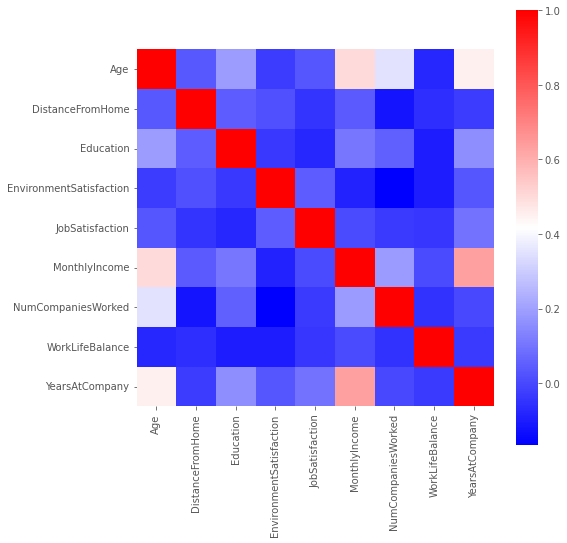

In [20]:
# Generating a heatmap to better explore the data of the left employees
plt.figure(figsize=(8, 8))
sns.heatmap(data=correlations, square=True, cmap='bwr')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

##### 4)DISTRIBUTION OF EMPLOYEES BY THE EDUCATION FIELD

In [21]:
# Ordering the data by the Education fields
employee_education_field = df_attrition_data.groupby('EducationField')
# Viewing all fields
employee_education_field.size()

EducationField
Human Resources      27
Life Sciences       606
Marketing           159
Medical             464
Other                82
Technical Degree    132
dtype: int64

In [22]:
fields = ['Human Resources', 'Life Sciences',
          'Marketing', 'Medical', 'Technical Degree', 'Other']
no_of_employees = [len(employee_education_field.get_group(i)) for i in fields]

In [23]:
# Additional imports for the plot
from matplotlib import style
%matplotlib inline

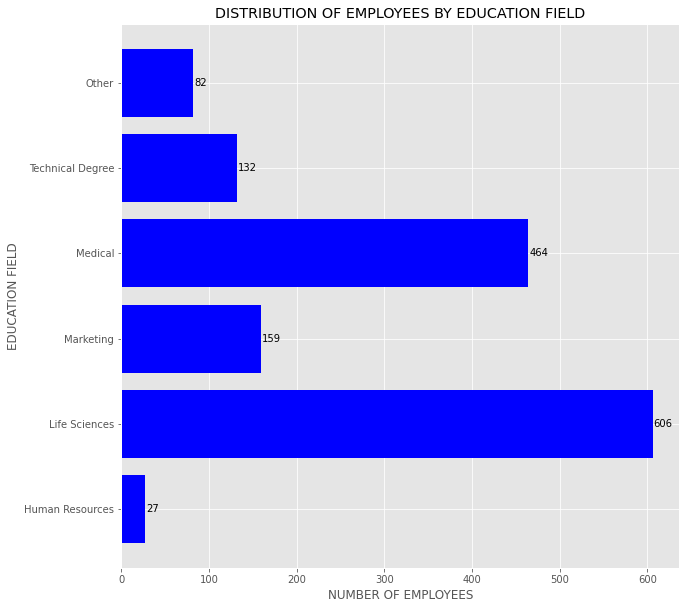

In [30]:
style.use('ggplot')

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
edu_bar = ax.barh(fields, no_of_employees, facecolor='b')

# Set title
ax.set_title("DISTRIBUTION OF EMPLOYEES BY EDUCATION FIELD")
ax.set_ylabel('EDUCATION FIELD')
ax.set_xlabel('NUMBER OF EMPLOYEES')

ax.bar_label(edu_bar, padding=1)
plt.show()

##### 5)BAR CHART FOR THE NUMBER OF MARRIED AND UNMARRIED COUPLES

In [31]:
employee_marital_status = df_attrition_data.groupby('MaritalStatus')
employee_marital_status.size()

MaritalStatus
Divorced    327
Married     673
Single      470
dtype: int64

In [32]:
status = ['Married', 'Unmarried']
# To obtain the number of married employees, we get the total number of employees with their marital status as 'Married'
married_employees = len(employee_marital_status.get_group('Married'))

# To obtain the number of unmarried employees, we get the total number of employees with their marital status as 'Divorced' and 'Single'
unmarried_employees = len(employee_marital_status.get_group(
    'Divorced')) + len(employee_marital_status.get_group('Single'))

number_of_employees = [married_employees, unmarried_employees]

In [33]:
# Additional imports for the plot
from matplotlib import style
%matplotlib inline

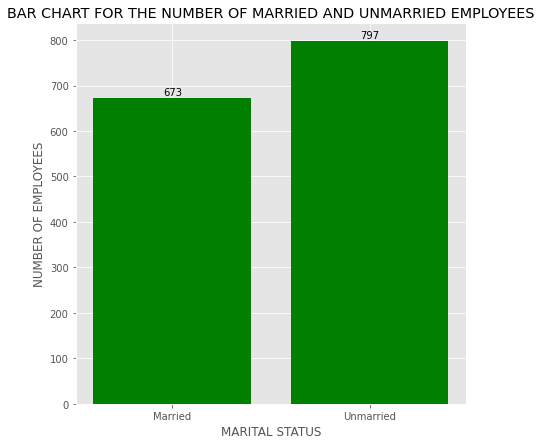

In [34]:
style.use('ggplot')

fig, ax = plt.subplots(1, 1, figsize=(7, 7))
bar = ax.bar(status, number_of_employees, facecolor='g')

# Set title
ax.set_title("BAR CHART FOR THE NUMBER OF MARRIED AND UNMARRIED EMPLOYEES")
ax.set_xlabel('MARITAL STATUS')
ax.set_ylabel('NUMBER OF EMPLOYEES')

ax.bar_label(bar, padding=1)

x = np.arange(len(status))
ax.set_xticks(x, status)

plt.show()

### BUILDING A LOGISTIC REGRESSION MODEL

In [5]:
df_attrition_data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [6]:
df_attrition_data.shape

(1470, 13)

In [7]:
# Conveting text labels into numerical labels
def educatonField(value):
    if value == 'Human Resources':
        return 1
    elif value == 'Life Sciences':
        return 2
    elif value == 'Marketing':
        return 3
    elif value == 'Medical':
        return 4
    elif value == 'Technical Degree':
        return 5
    else:
        return 6


df_attrition_data['EducationField'] = df_attrition_data['EducationField'].apply(
    educatonField)

In [8]:
def maritalStatus(value):
    if value == 'Divorced':
        return 1
    elif value == 'Married':
        return 2
    elif value == 'Single':
        return 3


df_attrition_data['MaritalStatus'] = df_attrition_data['MaritalStatus'].apply(
    maritalStatus)

In [9]:
def department(value):
    if value == 'Human Resources':
        return 1
    elif value == 'Research & Development':
        return 2
    elif value == 'Sales':
        return 3


df_attrition_data['Department'] = df_attrition_data['Department'].apply(
    department)

In [10]:
df_attrition_data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,3,1,2,2,2,4,3,5993,8,1,6
1,49,No,2,8,1,2,3,2,2,5130,1,3,10
2,37,Yes,2,2,2,6,4,3,3,2090,6,3,0
3,33,No,2,3,4,2,4,3,2,2909,1,3,8
4,27,No,2,2,1,4,1,2,2,3468,9,3,2


In [11]:
df_attrition_data.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [12]:
# Droppng the target column and settin gthe rest of the columns as the features
x_feature = df_attrition_data.drop('Attrition', axis=1)
x_feature.head()

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,3,1,2,2,2,4,3,5993,8,1,6
1,49,2,8,1,2,3,2,2,5130,1,3,10
2,37,2,2,2,6,4,3,3,2090,6,3,0
3,33,2,3,4,2,4,3,2,2909,1,3,8
4,27,2,2,1,4,1,2,2,3468,9,3,2


In [13]:
# setting the target column
y_target = df_attrition_data[['Attrition']]
y_target.head()

,Attrition
0,Yes
1,No
2,Yes
3,No
4,No


In [14]:
# Explorng the shape of the target and the feature data
print(f'x_feature shape: {x_feature.shape}')
print(f'y_target shape: {y_target.shape}')

x_feature shape: (1470, 12)
y_target shape: (1470, 1)


In [15]:
# Encoding labels for the target
from sklearn import preprocessing
# from sklearn.linear_model import LogisticRegression

label_encoder = preprocessing.LabelEncoder()
y_target = label_encoder.fit_transform(y_target)

C:\Users\molad\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
# Splitting the train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x_feature, y_target, test_size=0.3, random_state=44)

In [17]:
# Importing and initializing the Logistic Regression model to be used for the classification
# A Logistic Regression model is used as it'sis best for classification into 0's and 1's (Binary classification)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l2', C=0.1, max_iter=150)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

C:\Users\molad\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
# We determine the accuracy of the model
from sklearn import metrics
import numpy as np
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

Accuracy 0.8639455782312925


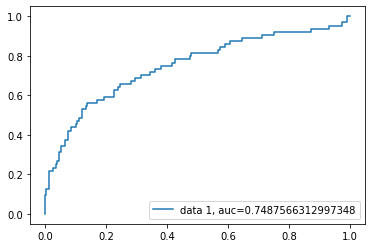

In [19]:
# Then to further understand the model's accuracy we plot a ROC-AUC Curve
y_pred_proba = clf.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()